In [1]:
#!pip install pandas
#!pip install seaborn
#!pip install scipy
#!pip install scikit-learn
#!pip install xgboost

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
df_merged_4=pd.read_csv("merged_final.csv")

/tmp/ipykernel_240269/3920389829.py:1: DtypeWarning: Columns (20,21,22,23,24,25,26,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged_4=pd.read_csv("merged_final.csv")


In [4]:
df_merged_4=df_merged_4.drop(["Unnamed: 0"], axis=1)
df_merged_4

,gender,anchor_age,dod,admission_location,race,hospital_expire_flag,insurance_cat,subject_id_hadm_id,first_careunit,last_careunit,...,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,Red Cell Distribution Width-SD,Sodium Level,U:C,White Blood Count
0,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
1,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
2,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
3,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
4,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423482,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,99992121_65661024783,2E ICU SJH,2E ICU SJH,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423483,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,99992121_65661024783,2E ICU SJH,2E ICU SJH,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423484,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,99992121_65661024783,2E ICU SJH,2E ICU SJH,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423485,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,99992121_65661024783,2E ICU SJH,2E ICU SJH,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9


In [5]:
df_merged_4=df_merged_4.drop_duplicates()
df_merged_4

,gender,anchor_age,dod,admission_location,race,hospital_expire_flag,insurance_cat,subject_id_hadm_id,first_careunit,last_careunit,...,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,Red Cell Distribution Width-SD,Sodium Level,U:C,White Blood Count
0,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
1,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
2,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
3,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
4,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,10008476_59065693895,2G ICU EUH,2G ICU EUH,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423482,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,99992121_65661024783,2E ICU SJH,2E ICU SJH,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423483,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,99992121_65661024783,2E ICU SJH,2E ICU SJH,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423484,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,99992121_65661024783,2E ICU SJH,2E ICU SJH,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423485,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,99992121_65661024783,2E ICU SJH,2E ICU SJH,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9


In [6]:
df_merged_4=df_merged_4.drop(["subject_id_hadm_id","micro_specimen_id"], axis=1)
df_merged_4

,gender,anchor_age,dod,admission_location,race,hospital_expire_flag,insurance_cat,first_careunit,last_careunit,los,...,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,Red Cell Distribution Width-SD,Sodium Level,U:C,White Blood Count
0,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
1,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
2,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
3,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
4,Female,25,2014-01-04,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423482,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,2E ICU SJH,2E ICU SJH,8.037269,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423483,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,2E ICU SJH,2E ICU SJH,8.037269,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423484,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,2E ICU SJH,2E ICU SJH,8.037269,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423485,Female,58,NaN,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,2E ICU SJH,2E ICU SJH,8.037269,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9


In [7]:
df_merged_4.dtypes

gender                              object
anchor_age                           int64
dod                                 object
admission_location                  object
race                                object
hospital_expire_flag                 int64
insurance_cat                       object
first_careunit                      object
last_careunit                       object
los                                float64
chartdate                           object
charttime                           object
spec_type_desc                      object
test_name                           object
org_name                            object
ab_name                             object
interpretation                      object
AG                                  object
Albumin Level                       object
Blood Urea Nitrogen                 object
Calcium Level Total                 object
Carbon Dioxide Level                object
Chloride Level                      object
Creatinine 

### Dropping Date of Death because it directly correlates to the death
Also deleting few other non-relevant columns
Interpretation column is not clinically relevant

In [8]:
df_merged_4=df_merged_4.drop(["dod", "chartdate", "charttime", "interpretation"], axis=1)

In [9]:
df_merged_4

,gender,anchor_age,admission_location,race,hospital_expire_flag,insurance_cat,first_careunit,last_careunit,los,spec_type_desc,...,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,Red Cell Distribution Width-SD,Sodium Level,U:C,White Blood Count
0,Female,25,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,Bronchial Washing,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
1,Female,25,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,Bronchial Washing,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
2,Female,25,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,Bronchial Washing,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
3,Female,25,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,Bronchial Washing,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
4,Female,25,TRANSFER FROM HOSP,"Unknown, Unavailable or Unreported",1,MEDICAID,2G ICU EUH,2G ICU EUH,3.054387,Bronchial Washing,...,11.9,313,217,3.1,4.57,12.9,46.8,158,10,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423482,Female,58,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,2E ICU SJH,2E ICU SJH,8.037269,Incision,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423483,Female,58,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,2E ICU SJH,2E ICU SJH,8.037269,Incision,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423484,Female,58,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,2E ICU SJH,2E ICU SJH,8.037269,Incision,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9
423485,Female,58,TRANSFER FROM HOSP,African American or Black,0,MEDICARE,2E ICU SJH,2E ICU SJH,8.037269,Incision,...,9.3,272,991,4.3,3.36,18.1,57.6,136,19,36.9


In [10]:
df_merged_4.dtypes

gender                              object
anchor_age                           int64
admission_location                  object
race                                object
hospital_expire_flag                 int64
insurance_cat                       object
first_careunit                      object
last_careunit                       object
los                                float64
spec_type_desc                      object
test_name                           object
org_name                            object
ab_name                             object
AG                                  object
Albumin Level                       object
Blood Urea Nitrogen                 object
Calcium Level Total                 object
Carbon Dioxide Level                object
Chloride Level                      object
Creatinine                          object
Estimated GFR                       object
Estimated GFR, African American     object
Glucose                             object
Hematocrit 

In [11]:
df_merged_4['hospital_expire_flag'] = df_merged_4['hospital_expire_flag'].astype('object')

In [12]:
df_merged_4.replace('UNABLE TO CALC', np.nan, inplace=True)
df_merged_4.replace('Not Applicable', np.nan, inplace=True)
df_merged_4.replace('See Comments', np.nan, inplace=True)
df_merged_4.replace('See comments', np.nan, inplace=True)
df_merged_4.replace('see comments', np.nan, inplace=True)
df_merged_4.replace('FOOTNOTE', np.nan, inplace=True)
df_merged_4.replace('--', np.nan, inplace=True)
df_merged_4.replace('****', np.nan, inplace=True)
df_merged_4.replace('***', np.nan, inplace=True)
df_merged_4.replace('NOT APPLICABLE', np.nan, inplace=True)
df_merged_4.replace('CLOTTED', np.nan, inplace=True)
df_merged_4.replace('Unreportable', np.nan, inplace=True)
df_merged_4.replace('clotted', np.nan, inplace=True)
df_merged_4.replace('>304', 305, inplace=True)
df_merged_4.replace('>350', 360, inplace=True)



#see comments

df_merged_4.replace('see note', np.nan, inplace=True)
df_merged_4.replace('<1.0', 0.9, inplace=True)
df_merged_4.replace('<1.5', 1.4, inplace=True)
df_merged_4.replace('>52', 53, inplace=True)
df_merged_4.replace('<21', 20, inplace=True)

df_merged_4.replace('<2', 1.9, inplace=True)


df_merged_4.replace('>125', 126, inplace=True)
df_merged_4.replace('>18.0', 18.5, inplace=True)
df_merged_4.replace('>20.0', 21.0, inplace=True)
df_merged_4.replace('>45', 46, inplace=True)
df_merged_4.replace('>35', 36, inplace=True)
df_merged_4.replace('<6', 5, inplace=True)
df_merged_4.replace('<5', 4, inplace=True)
df_merged_4.replace('>150', 160, inplace=True)
df_merged_4.replace('<0.30', 0.25, inplace=True)
df_merged_4.replace('<0.20', 0.15, inplace=True)
df_merged_4.replace('>70', 75, inplace=True)
df_merged_4.replace('<10', 9, inplace=True)
df_merged_4.replace('>10.0', 11.0, inplace=True)
df_merged_4.replace('>15.0', 16.0, inplace=True)

df_merged_4.replace('#NM', np.nan, inplace=True)

df_merged_4.replace('>40.7', 41.0, inplace=True)
df_merged_4.replace('>14.0', 15.0, inplace=True)
df_merged_4.replace('<0.1', 0.05, inplace=True)
df_merged_4.replace('<0.03', 0.01, inplace=True)
df_merged_4.replace('<1', 0.9, inplace=True)

In [13]:
# Define the new data types for multiple columns
new_dtypes = {
"AG": "float64",
"Albumin Level"                         :'float64', 
"Blood Urea Nitrogen"                    :'float64', 
"Calcium Level Total" :'float64', 
"Carbon Dioxide Level"                   :'float64', 
"Chloride Level"                        :'float64', 
"Creatinine"                             :'float64', 
'Estimated GFR'                          :'float64', 
"Estimated GFR, African American"        :'float64', 
"Glucose"                                :'float64', 
"Hematocrit"                             :'float64', 
"Hemoglobin"                             :'float64', 
"MCH"                                    :'float64', 
"MCHC"                                   :'float64', 
"MCV"                                    :'float64', 
'Mean Platelet Volume'                   :'float64', 
"Osmolality, Calculated"              :'float64',    
'Platelet Count'                      :'float64', 
"Potassium Level"                     :'float64', 
'Red Blood Cell Count'                :'float64', 
'Red Cell Distribution Width-CV'      :'float64', 
'Red Cell Distribution Width-SD':'float64',       
'Sodium Level'     :'float64',                    
'U:C'              :'float64',                   
'White Blood Count':'float64'
}

# Apply the new data types
df_merged_4 = df_merged_4.astype(new_dtypes)





In [14]:
# Identify categorical and numerical columns
categorical_cols = df_merged_4.select_dtypes(include=['object']).columns
numerical_cols = df_merged_4.select_dtypes(include=[np.number]).columns

In [15]:
categorical_cols=list(categorical_cols)

In [16]:
categorical_cols

['gender',
 'admission_location',
 'race',
 'hospital_expire_flag',
 'insurance_cat',
 'first_careunit',
 'last_careunit',
 'spec_type_desc',
 'test_name',
 'org_name',
 'ab_name']

In [17]:
numerical_cols=list(numerical_cols)

In [18]:
numerical_cols

['anchor_age',
 'los',
 'AG',
 'Albumin Level',
 'Blood Urea Nitrogen',
 'Calcium Level Total',
 'Carbon Dioxide Level',
 'Chloride Level',
 'Creatinine',
 'Estimated GFR',
 'Estimated GFR, African American',
 'Glucose',
 'Hematocrit',
 'Hemoglobin',
 'MCH',
 'MCHC',
 'MCV',
 'Mean Platelet Volume',
 'Osmolality, Calculated',
 'Platelet Count',
 'Potassium Level',
 'Red Blood Cell Count',
 'Red Cell Distribution Width-CV',
 'Red Cell Distribution Width-SD',
 'Sodium Level',
 'U:C',
 'White Blood Count']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Dictionary to store the mappings for each column
label_mappings = {}

# Apply LabelEncoder to each categorical column and store the mappings
for column in categorical_cols:
    # Fit the label encoder to the column
    df_merged_4[column] = le.fit_transform(df_merged_4[column])
    
    # Store the mapping: original values and corresponding encoded labels
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the label mappings
for column, mapping in label_mappings.items():
    print(f"Mapping for column '{column}':")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value}: {encoded_value}")
    print()


Mapping for column 'gender':
  Female: 0
  Male: 1

Mapping for column 'admission_location':
  COURT/LAW ENFORCEMNT: 0
  INFO NOT AVAILABLE: 1
  NON-HC FACILITY POO: 2
  PHYSIC OFC/CLINIC: 3
  TFR FRM AMB SURG CTR: 4
  TFR FRM HOSPICE: 5
  TFR FROM OTHER HCF: 6
  TFR FROM SAME FACIL: 7
  TRANSFER FROM HOSP: 8
  TRANSFER FROM SNF: 9

Mapping for column 'race':
  African American or Black: 0
  American or Alaskan or Hawaiian Native: 1
  Asian: 2
  Caucasian or White: 3
  Hispanic: 4
  Multiple: 5
  Unknown, Unavailable or Unreported: 6

Mapping for column 'hospital_expire_flag':
  0: 0
  1: 1

Mapping for column 'insurance_cat':
  GOV: 0
  MEDICAID: 1
  MEDICAID ADVANTAGE: 2
  MEDICARE: 3
  MEDICARE : 4
  MEDICARE ADVANTAGE: 5
  MEDICARE_MEDICAID: 6
  PRIVATE: 7
  SELF PAY: 8
  WORKERS COMP: 9
  nan: 10

Mapping for column 'first_careunit':
  11 ICU ECLH: 0
  1F ICU EJCH: 1
  21 ICU ECLH: 2
  2D-E ICU EUH: 3
  2D-W ICU EUH: 4
  2E ICU SJH: 5
  2G ICU EUH: 6
  2G-N CCU EUH: 7
  2G-S ICU E

In [21]:
df_merged_4

,gender,anchor_age,admission_location,race,hospital_expire_flag,insurance_cat,first_careunit,last_careunit,los,spec_type_desc,...,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,Red Cell Distribution Width-SD,Sodium Level,U:C,White Blood Count
0,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
1,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
2,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
3,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
4,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423482,0,58,8,0,0,3,5,4,8.037269,40,...,9.3,272.0,991.0,4.3,3.36,18.1,57.6,136.0,19.0,36.9
423483,0,58,8,0,0,3,5,4,8.037269,40,...,9.3,272.0,991.0,4.3,3.36,18.1,57.6,136.0,19.0,36.9
423484,0,58,8,0,0,3,5,4,8.037269,40,...,9.3,272.0,991.0,4.3,3.36,18.1,57.6,136.0,19.0,36.9
423485,0,58,8,0,0,3,5,4,8.037269,40,...,9.3,272.0,991.0,4.3,3.36,18.1,57.6,136.0,19.0,36.9


In [22]:
df_merged_4.dtypes

gender                               int64
anchor_age                           int64
admission_location                   int64
race                                 int64
hospital_expire_flag                 int64
insurance_cat                        int64
first_careunit                       int64
last_careunit                        int64
los                                float64
spec_type_desc                       int64
test_name                            int64
org_name                             int64
ab_name                              int64
AG                                 float64
Albumin Level                      float64
Blood Urea Nitrogen                float64
Calcium Level Total                float64
Carbon Dioxide Level               float64
Chloride Level                     float64
Creatinine                         float64
Estimated GFR                      float64
Estimated GFR, African American    float64
Glucose                            float64
Hematocrit 

In [23]:
df_merged_4 = df_merged_4.astype({"gender":'object',
                "admission_location":"object",
                "race":"object",
                "hospital_expire_flag":"object",
                "insurance_cat":"object",
                "first_careunit":"object",
                "last_careunit":"object",
                "spec_type_desc":"object",
                "test_name":"object",
                "org_name":"object",
                "ab_name":"object"
               })

df_merged_4.dtypes

gender                              object
anchor_age                           int64
admission_location                  object
race                                object
hospital_expire_flag                object
insurance_cat                       object
first_careunit                      object
last_careunit                       object
los                                float64
spec_type_desc                      object
test_name                           object
org_name                            object
ab_name                             object
AG                                 float64
Albumin Level                      float64
Blood Urea Nitrogen                float64
Calcium Level Total                float64
Carbon Dioxide Level               float64
Chloride Level                     float64
Creatinine                         float64
Estimated GFR                      float64
Estimated GFR, African American    float64
Glucose                            float64
Hematocrit 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df=df_merged_4

In [26]:
df

,gender,anchor_age,admission_location,race,hospital_expire_flag,insurance_cat,first_careunit,last_careunit,los,spec_type_desc,...,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,Red Cell Distribution Width-SD,Sodium Level,U:C,White Blood Count
0,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
1,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
2,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
3,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
4,0,25,8,6,1,1,6,5,3.054387,19,...,11.9,313.0,217.0,3.1,4.57,12.9,46.8,158.0,10.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423482,0,58,8,0,0,3,5,4,8.037269,40,...,9.3,272.0,991.0,4.3,3.36,18.1,57.6,136.0,19.0,36.9
423483,0,58,8,0,0,3,5,4,8.037269,40,...,9.3,272.0,991.0,4.3,3.36,18.1,57.6,136.0,19.0,36.9
423484,0,58,8,0,0,3,5,4,8.037269,40,...,9.3,272.0,991.0,4.3,3.36,18.1,57.6,136.0,19.0,36.9
423485,0,58,8,0,0,3,5,4,8.037269,40,...,9.3,272.0,991.0,4.3,3.36,18.1,57.6,136.0,19.0,36.9


In [27]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Initialize a correlation matrix
correlation_matrix = pd.DataFrame(np.zeros((len(df.columns), len(df.columns))), 
                                  index=df.columns, columns=df.columns)

# Populate correlation matrix
for col1 in df.columns:
    for col2 in df.columns:
        if col1 in numerical_cols and col2 in numerical_cols:
            correlation_matrix.loc[col1, col2] = df[[col1, col2]].corr().iloc[0, 1]
        elif col1 in categorical_cols and col2 in categorical_cols:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            # Correlation between numerical and categorical variables
            correlation_matrix.loc[col1, col2] = np.nan  # You can apply other techniques if needed


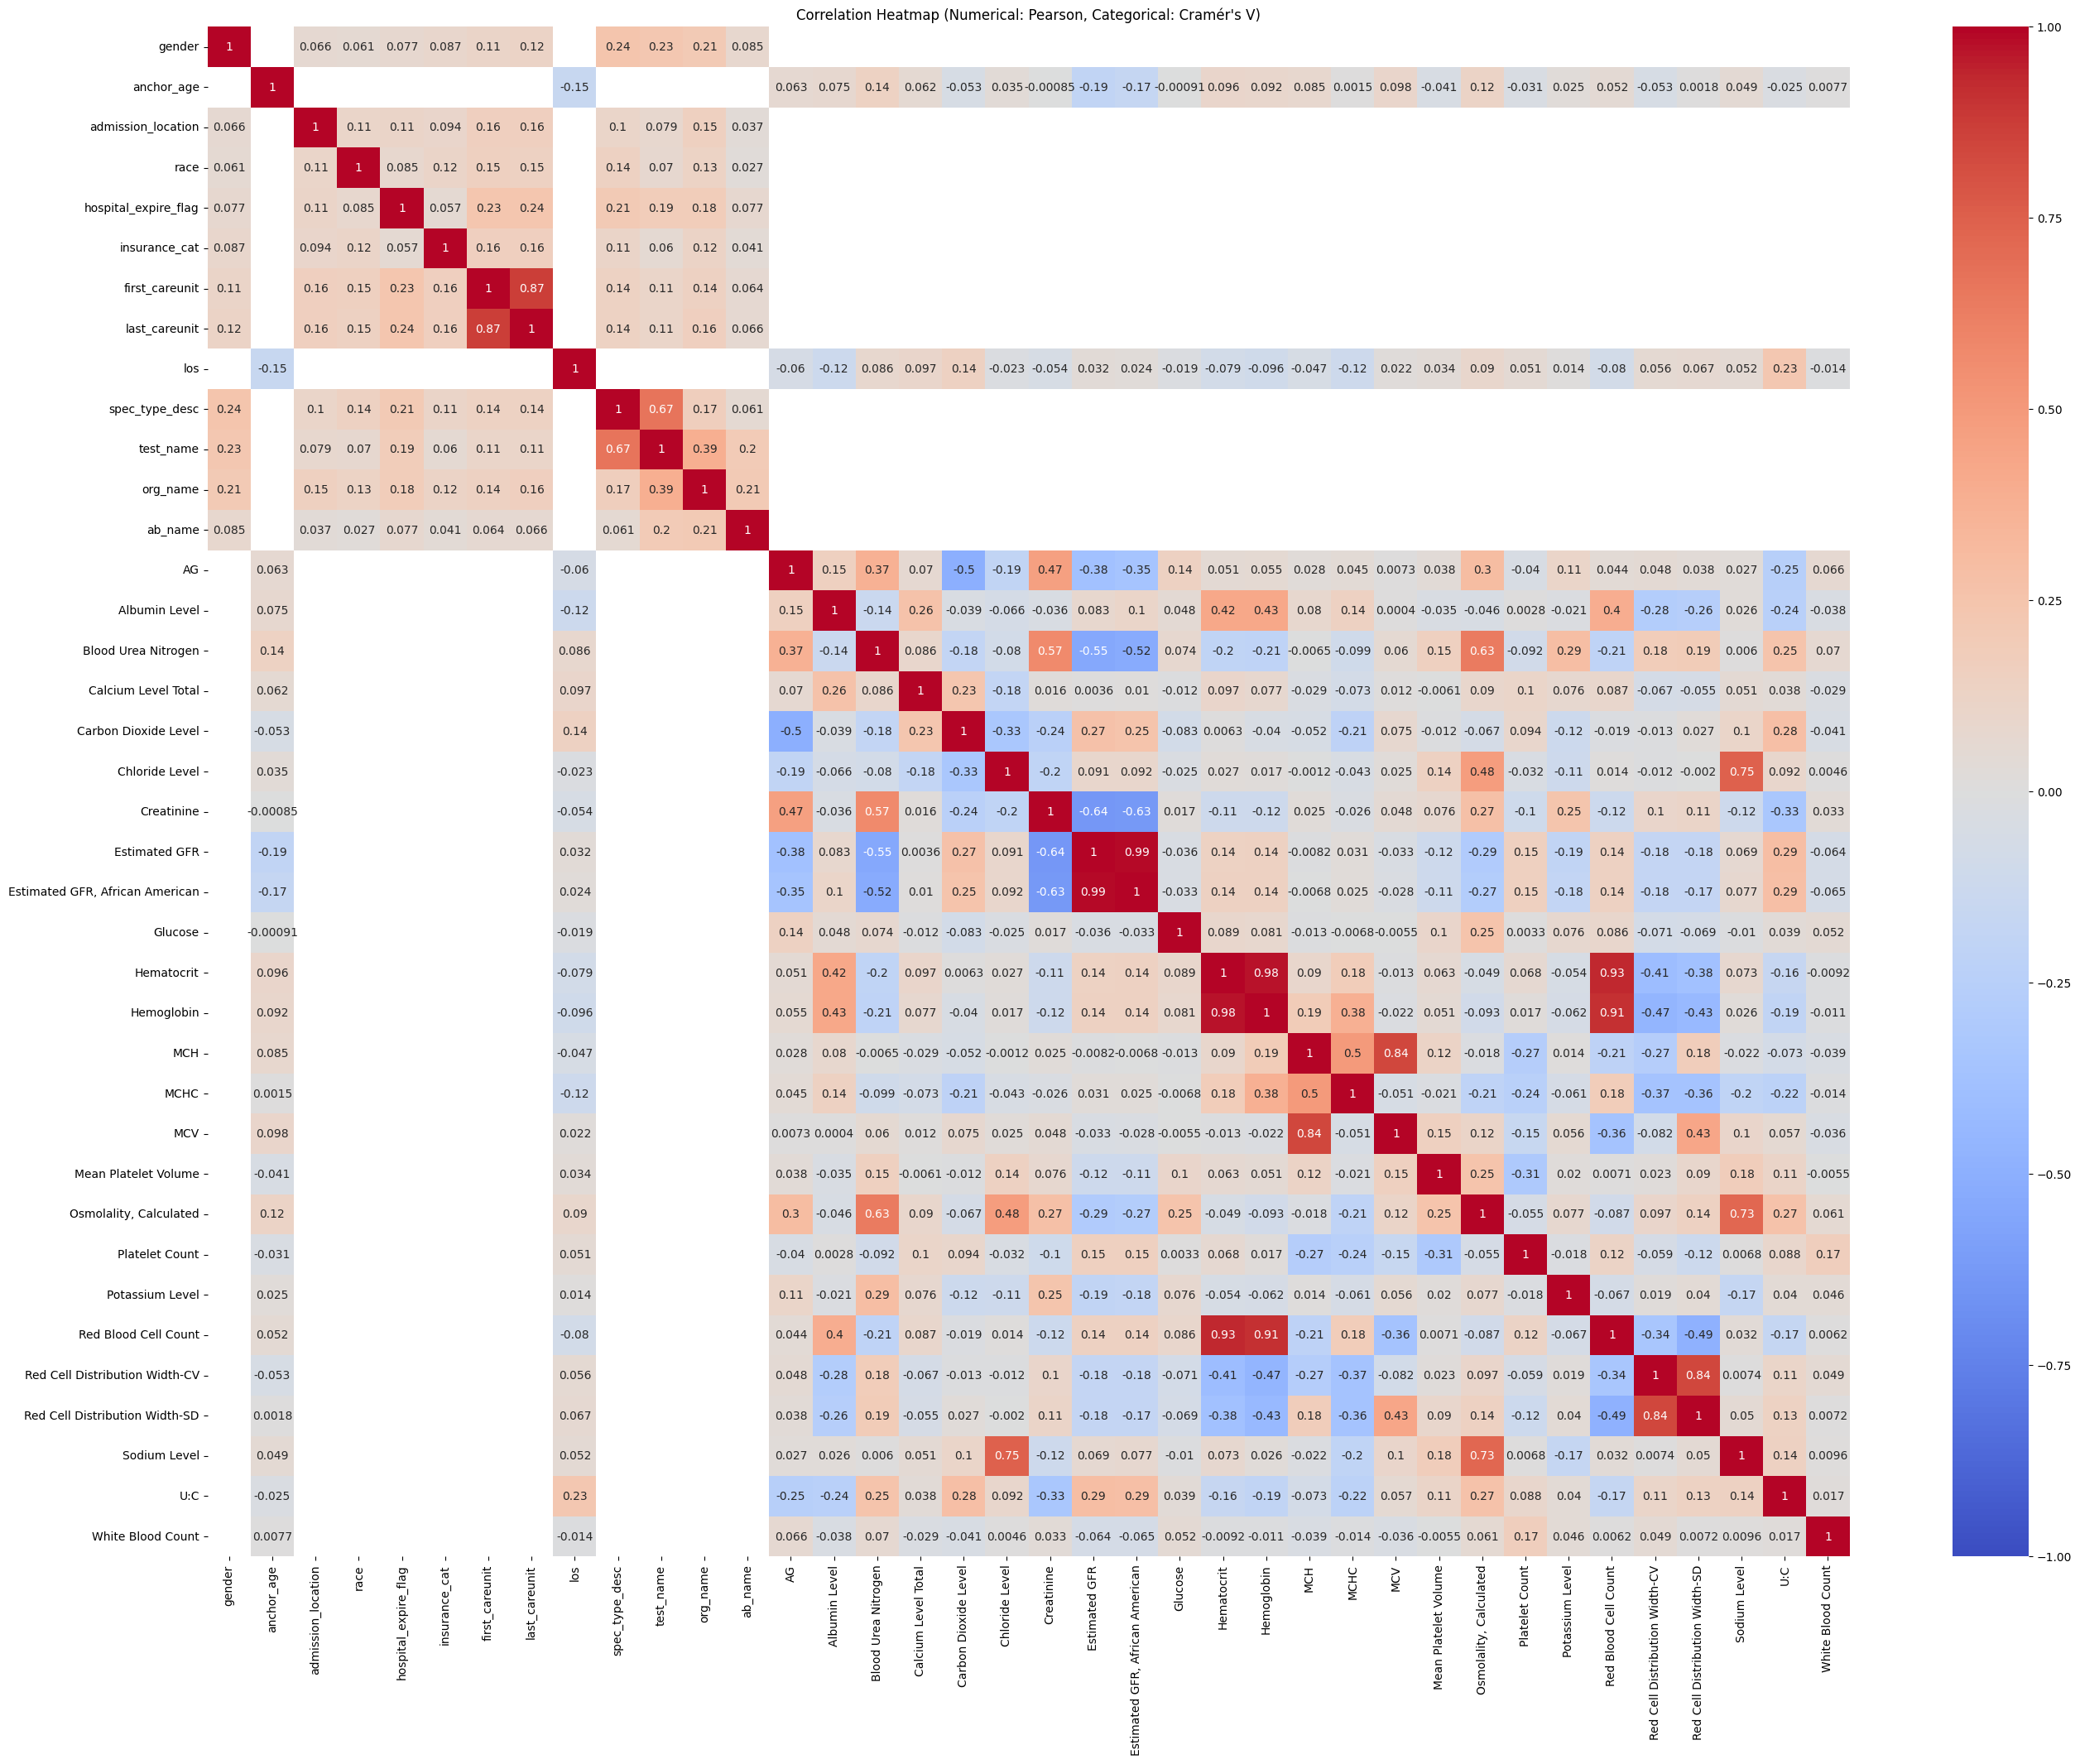

In [28]:
# Plot the heatmap
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=correlation_matrix.isnull(), vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numerical: Pearson, Categorical: Cramér's V)")
plt.show()

#### First care unit and last care unit are highly correlated
#### Estimated GFR and Estimated GFR African American
#### Red Blood Cell and Hematocrit, same with Hemoglobin, thus removing Red Blood Cell Count
#### Sodium level with Chlroide level, same with Osmolality, Calculated
#### Hematocrit and Hemoglobin are also highly correlated
#### Red Cell Distribution Width-CV and RCD Width-SD

## Removing highly correlated features

In [29]:
df=df.drop(["Estimated GFR, African American","last_careunit", "Hematocrit", "Hemoglobin", "MCV", "Sodium Level", "spec_type_desc", "Red Cell Distribution Width-SD"],axis=1)

In [30]:
df

,gender,anchor_age,admission_location,race,hospital_expire_flag,insurance_cat,first_careunit,los,test_name,org_name,...,MCH,MCHC,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,U:C,White Blood Count
0,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
1,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
2,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
3,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
4,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423482,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
423483,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
423484,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
423485,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9


In [31]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

categorical_cols=list(categorical_cols)
numerical_cols=list(numerical_cols)

In [32]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Initialize a correlation matrix
correlation_matrix = pd.DataFrame(np.zeros((len(df.columns), len(df.columns))), 
                                  index=df.columns, columns=df.columns)

# Populate correlation matrix
for col1 in df.columns:
    for col2 in df.columns:
        if col1 in numerical_cols and col2 in numerical_cols:
            correlation_matrix.loc[col1, col2] = df[[col1, col2]].corr().iloc[0, 1]
        elif col1 in categorical_cols and col2 in categorical_cols:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            # Correlation between numerical and categorical variables
            correlation_matrix.loc[col1, col2] = np.nan  # You can apply other techniques if needed

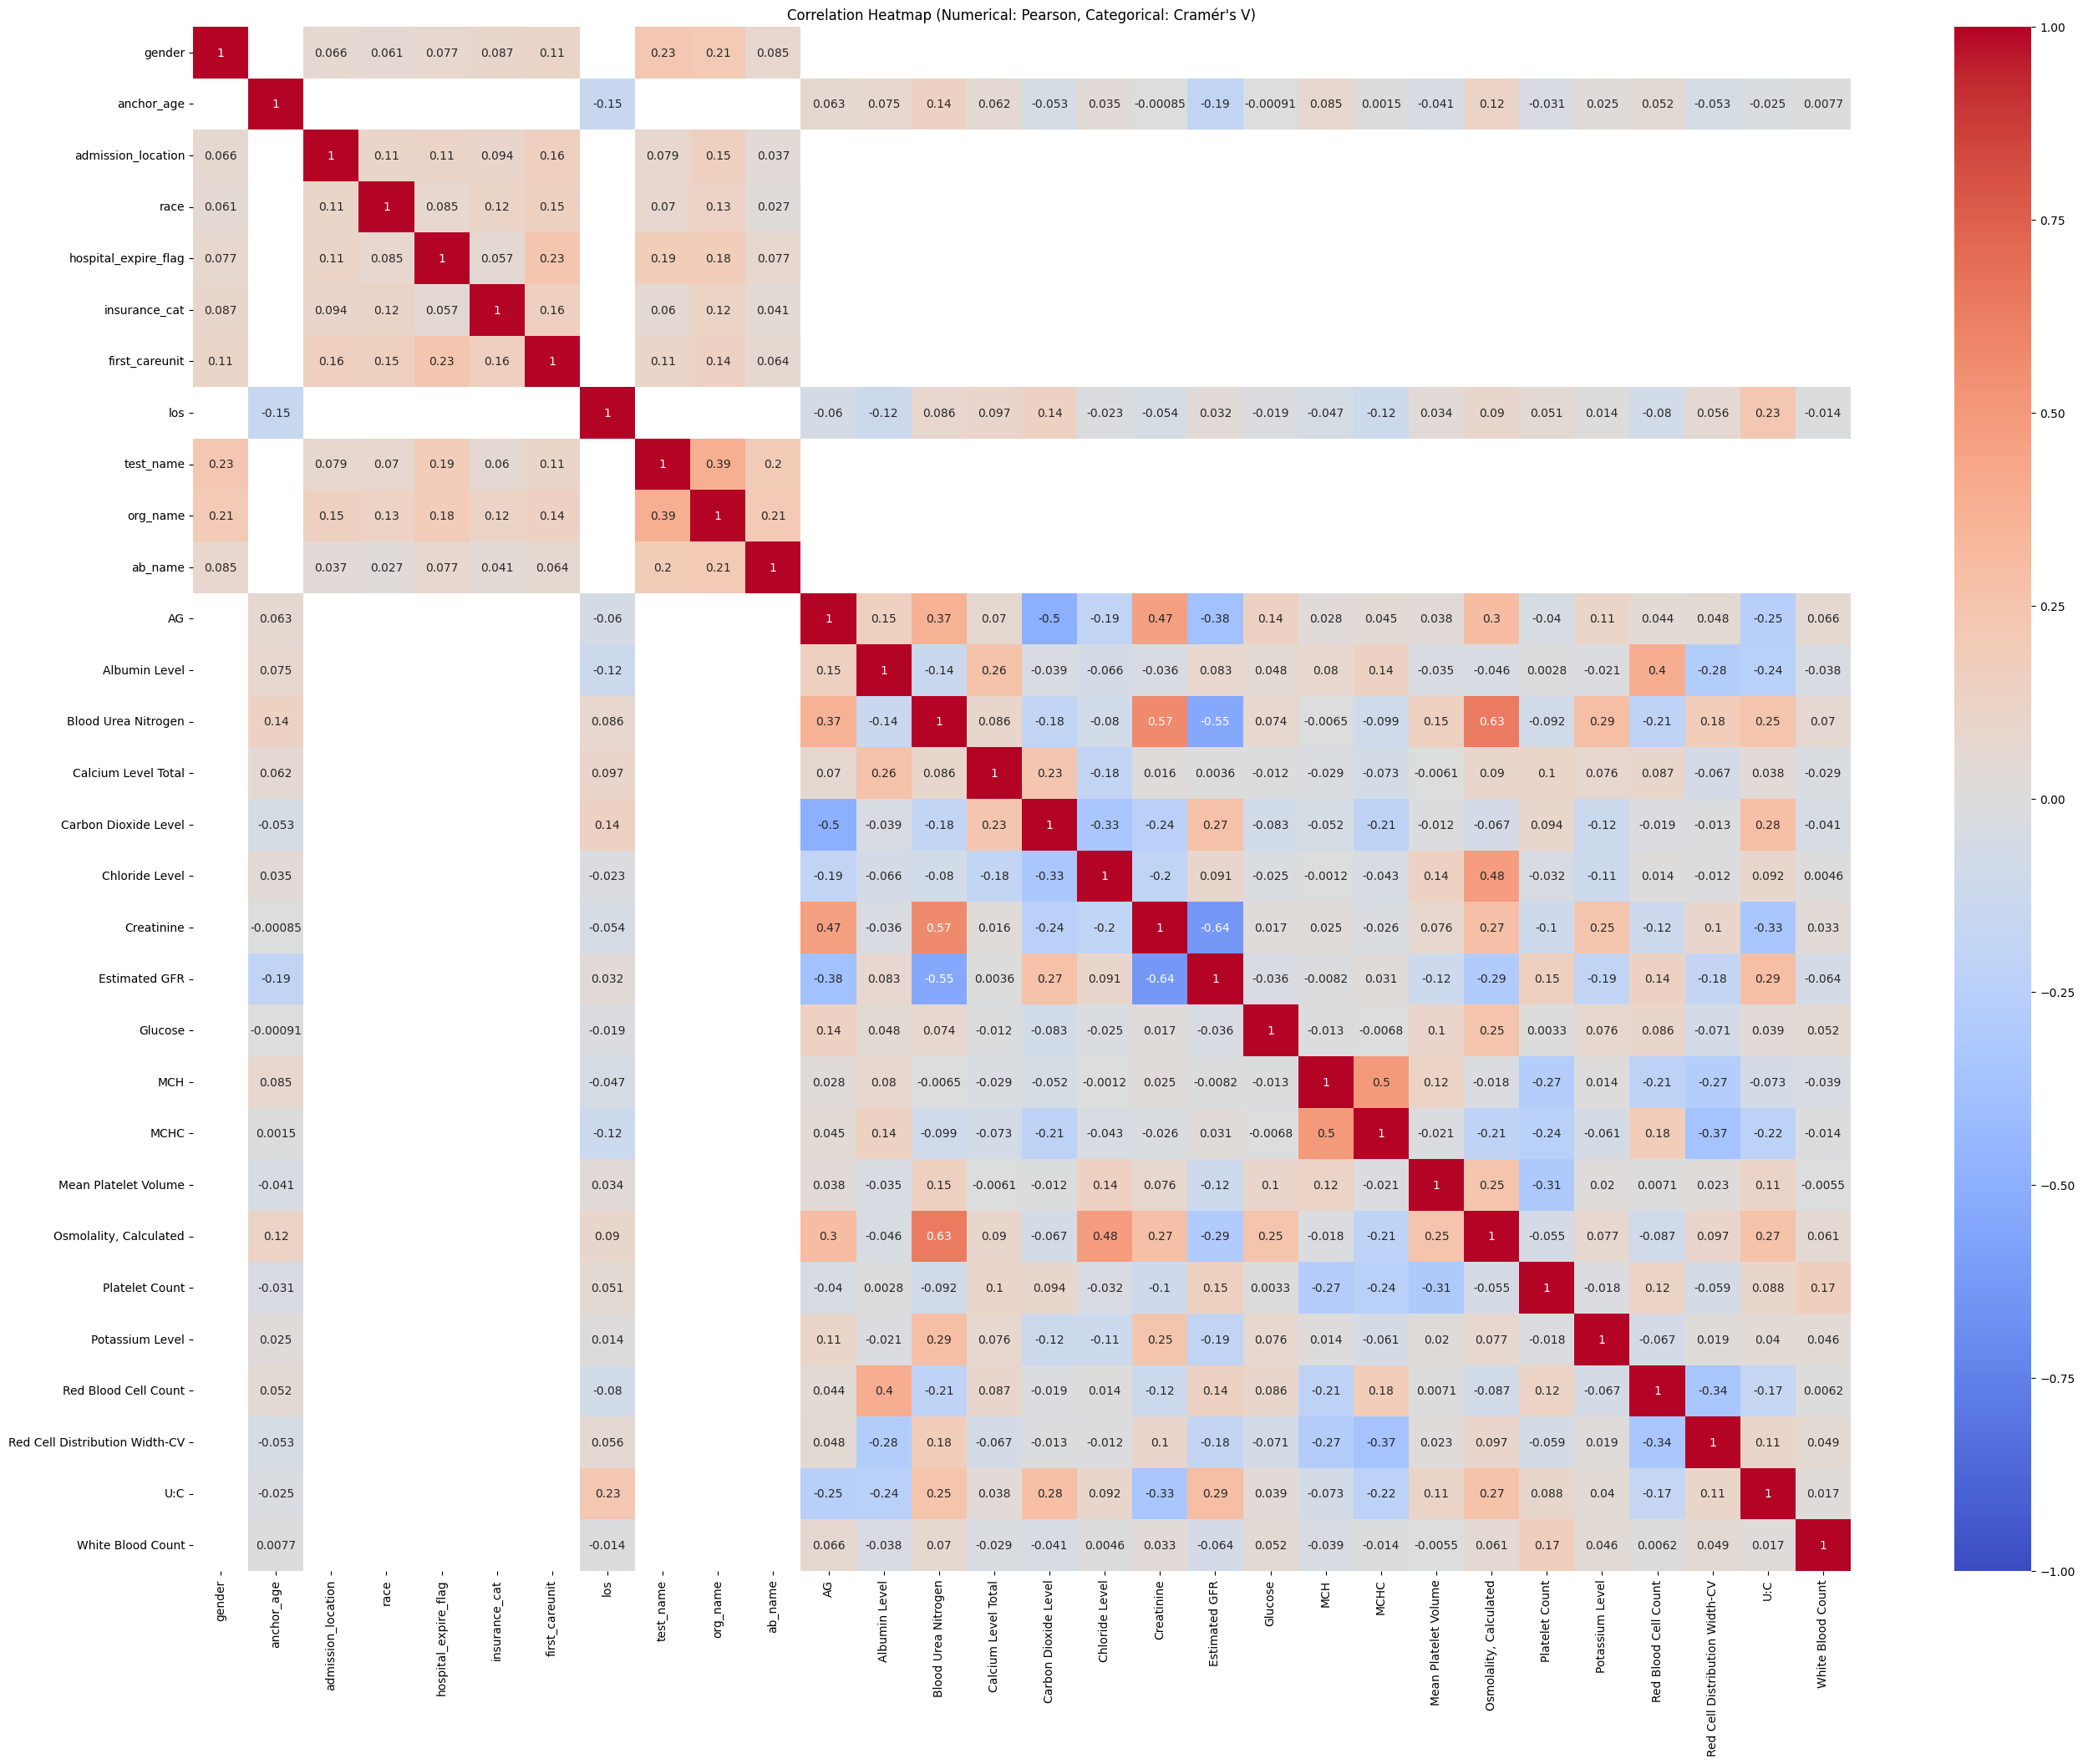

In [33]:
# Plot the heatmap
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=correlation_matrix.isnull(), vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numerical: Pearson, Categorical: Cramér's V)")
plt.show()

In [34]:
df=df.drop_duplicates()
df

,gender,anchor_age,admission_location,race,hospital_expire_flag,insurance_cat,first_careunit,los,test_name,org_name,...,MCH,MCHC,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,U:C,White Blood Count
0,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
1,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
2,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
3,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
4,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423482,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
423483,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
423484,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
423485,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9


In [35]:
df=df.dropna(subset=['hospital_expire_flag'])

In [36]:
df["hospital_expire_flag"].value_counts()

hospital_expire_flag
0    185528
1    174479
Name: count, dtype: int64

In [44]:
df=df.reset_index()
df=df.drop(["index"],axis=1)
df

,gender,anchor_age,admission_location,race,hospital_expire_flag,insurance_cat,first_careunit,los,test_name,org_name,...,MCH,MCHC,Mean Platelet Volume,"Osmolality, Calculated",Platelet Count,Potassium Level,Red Blood Cell Count,Red Cell Distribution Width-CV,U:C,White Blood Count
0,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
1,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
2,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
3,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
4,0,25,8,6,1,1,6,3.054387,17,127,...,31.9,32.3,11.9,313.0,217.0,3.1,4.57,12.9,10.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360002,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
360003,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
360004,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9
360005,0,58,8,0,0,3,5,8.037269,28,127,...,27.4,31.4,9.3,272.0,991.0,4.3,3.36,18.1,19.0,36.9


In [45]:
X = df.drop('hospital_expire_flag', axis=1)
y = df['hospital_expire_flag']

In [46]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [48]:
#Build and Train  Model
# Create the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:51:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [65]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(np.array(y_pred), np.array(list(y_test)))
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9610


In [66]:
# Get feature importance scores
importance_scores = model.get_booster().get_score(importance_type='weight')

# Convert the scores to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores.values()
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)

                           Feature  Importance
0                       anchor_age       335.0
1             Red Blood Cell Count       255.0
2                White Blood Count       235.0
3                   Platelet Count       233.0
4   Red Cell Distribution Width-CV       233.0
5                              MCH       232.0
6             Mean Platelet Volume       227.0
7                              los       226.0
8                          Glucose       218.0
9                       Creatinine       205.0
10             Calcium Level Total       198.0
11                   Albumin Level       193.0
12                            MCHC       187.0
13                   Estimated GFR       180.0
14                              AG       177.0
15                             U:C       176.0
16             Blood Urea Nitrogen       169.0
17          Osmolality, Calculated       168.0
18                  Chloride Level       166.0
19                  first_careunit       164.0
20           

In [68]:
X = df.drop(['hospital_expire_flag', 'ab_name'], axis=1)
y = df['hospital_expire_flag']

In [69]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [71]:
#Build and Train  Model
# Create the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:03:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [72]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(np.array(y_pred), np.array(list(y_test)))
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9610


In [74]:

# Generate and print the classification report
report = classification_report(np.array(y_pred), np.array(list(y_test)))
print(report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     56992
           1       0.95      0.97      0.96     51011

    accuracy                           0.96    108003
   macro avg       0.96      0.96      0.96    108003
weighted avg       0.96      0.96      0.96    108003



In [95]:
param_grid = {
    'learning_rate': [0.005, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [96]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [97]:
grid_search.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:30:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:30:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:30:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:30:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=  15.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=  27.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=  12.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=  12.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=  21.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=  18.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=2

/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/j

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=  21.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=  13.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=  29.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=  11.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=

/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/jupyter-atika/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/j

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.005, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [98]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}


In [90]:
#print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [99]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

/home/jupyter-atika/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:31:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.005, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [100]:
y_pred=best_model.predict(X_test)

In [101]:
# Calculate accuracy
accuracy = accuracy_score(np.array(y_pred), np.array(list(y_test)))
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6540


In [102]:
# Generate and print the classification report
report = classification_report(np.array(y_pred), np.array(list(y_test)))
print(report)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71     74380
           1       0.46      0.72      0.57     33623

    accuracy                           0.65    108003
   macro avg       0.65      0.67      0.64    108003
weighted avg       0.72      0.65      0.67    108003

